In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('../DataOut/bus_trip_all_points_moddedDF.csv')
# import bus trips
bus_trips = pd.read_csv("../DataOut/bus_trips.csv")

In [2]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1200919,895005999,1410,2022-02-24 14:51:43,7.291685,80.635282,3.23974,2022-02-24,14:51:43,POINT (184714.16084255013 232167.22405422156),BT01,15560.0,2
1200920,895682420,1410,2022-02-24 17:50:08,7.299123,80.734463,2.69978,2022-02-24,17:50:08,POINT (195665.40886624547 232987.66098395272),BT02,15562.0,2
1200921,895866047,1410,2022-02-24 18:46:53,7.291740,80.635173,10.25920,2022-02-24,18:46:53,POINT (184702.20468358186 232173.30970404382),BT01,15562.0,2
1200922,902155697,1410,2022-02-26 15:10:01,7.299070,80.734537,0.00000,2022-02-26,15:10:01,POINT (195673.50168209182 232981.76628487784),BT02,15574.0,2


In [3]:
# get the unique dates in sorted order
data['date'].unique()



array(['2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19',
       '2021-10-21', '2021-10-22', '2021-10-23', '2021-10-24',
       '2021-10-26', '2021-10-27', '2021-10-28', '2021-10-29',
       '2021-10-31', '2021-11-02', '2021-11-03', '2021-11-04',
       '2021-11-07', '2021-11-08', '2021-11-09', '2021-11-11',
       '2021-11-12', '2021-11-13', '2021-11-14', '2021-11-16',
       '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-21',
       '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-26',
       '2021-11-27', '2021-11-28', '2021-11-29', '2021-12-01',
       '2021-12-03', '2021-12-04', '2021-12-06', '2021-12-07',
       '2021-12-08', '2021-12-09', '2021-12-11', '2021-12-12',
       '2021-12-13', '2021-12-14', '2021-12-16', '2021-12-17',
       '2021-12-18', '2021-12-19', '2021-12-21', '2021-12-22',
       '2021-12-23', '2021-12-24', '2021-12-27', '2021-12-28',
       '2021-12-29', '2022-01-01', '2022-01-02', '2022-01-03',
       '2022-01-04', '2022-01-06', '2022-01-07', '2022-

In [4]:
# print a list of unique trip ids
trip_ids = data['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 378, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424

In [5]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
0,574733098,116,2021-10-16 08:03:04,7.293092,80.635573,9.17927,2021-10-16,08:03:04,POINT (184746.41595346577 232322.75960448402),BT01,2.0,1
1,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),NaN,2.0,1
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1200919,895005999,1410,2022-02-24 14:51:43,7.291685,80.635282,3.23974,2022-02-24,14:51:43,POINT (184714.16084255013 232167.22405422156),BT01,15560.0,2
1200920,895682420,1410,2022-02-24 17:50:08,7.299123,80.734463,2.69978,2022-02-24,17:50:08,POINT (195665.40886624547 232987.66098395272),BT02,15562.0,2
1200921,895866047,1410,2022-02-24 18:46:53,7.291740,80.635173,10.25920,2022-02-24,18:46:53,POINT (184702.20468358186 232173.30970404382),BT01,15562.0,2
1200922,902155697,1410,2022-02-26 15:10:01,7.299070,80.734537,0.00000,2022-02-26,15:10:01,POINT (195673.50168209182 232981.76628487784),BT02,15574.0,2


In [6]:
# get the count of the number of unique dates in this df
data['date'].nunique()

271

## Detect and remove Anomaly Trips

In [7]:

# from sklearn.metrics.pairwise import haversine_distances
# from math import radians

# # Define a function to calculate Haversine distance between two points
# def haversine_distance(coord1, coord2):
#     coord1 = [radians(x) for x in coord1]
#     coord2 = [radians(x) for x in coord2]
#     dist = haversine_distances([coord1, coord2])
#     return dist[0][1] * 6371000.0  # Multiply by Earth radius to get distance in meters

# # Define the anomaly detection function
# def detect_anomalies(data, trip_id_column, longitude_column, latitude_column, reference_data, reference_trip_id, threshold_distance_meters=200):
#     reference_locations = reference_data[reference_data[trip_id_column] == reference_trip_id]
#     reference_locations = reference_locations[[latitude_column, longitude_column]].values
    
#     anomalies = []
#     for trip_id in data[trip_id_column].unique():
#         trip_data = data[data[trip_id_column] == trip_id]
#         gps_locations = trip_data[[latitude_column, longitude_column]].values
        
#         anomaly_count = 0
#         for location in gps_locations:
#             min_distance = min([haversine_distance(location, ref_loc) for ref_loc in reference_locations])
#             if min_distance > threshold_distance_meters:
#                 anomaly_count += 1
#         print(f"anomaly count : {anomaly_count}")
#         if anomaly_count / len(gps_locations) >= 0.1:
#             anomalies.append(trip_id)
#             print(f"anomaly trip id : {trip_id}")
    
#     return anomalies

# # Columns for trip ID, longitude, and latitude in your DataFrame
# trip_id_column = 'trip_id'
# longitude_column = 'longitude'
# latitude_column = 'latitude'

# # Reference data for correct GPS locations (longitude and latitude values)
# reference_trip_id = 4  # Specify the trip ID for which to get the reference data
# reference_data = data[data[trip_id_column] == reference_trip_id]  # Filter reference data

# # Detect and remove anomaly trips
# anomaly_trip_ids = detect_anomalies(data, trip_id_column, longitude_column, latitude_column, reference_data, reference_trip_id)
# cleaned_data = data[~data[trip_id_column].isin(anomaly_trip_ids)]

# print(f"Anomaly trips detected and removed: {anomaly_trip_ids}")

# # save anomally trip id list in to csv file
# anomaly_trip_ids_df = pd.DataFrame(anomaly_trip_ids)
# anomaly_trip_ids_df.to_csv('../DataOut/anomaly_trip_ids.csv', index=False)



In [8]:
# import pandas as pd
# from sklearn.metrics.pairwise import haversine_distances
# from math import radians
# from concurrent.futures import ThreadPoolExecutor

# # Define a function to calculate Haversine distance between two points
# def haversine_distance(coord1, coord2):
#     coord1 = [radians(x) for x in coord1]
#     coord2 = [radians(x) for x in coord2]
#     dist = haversine_distances([coord1, coord2])
#     return dist[0][1] * 6371000.0  # Multiply by Earth radius to get distance in meters


# # Define a function to process each trip ID for anomaly detection
# def process_trip(trip_data, reference_data, threshold_distance_meters):
#     reference_locations = reference_data[[latitude_column, longitude_column]].values
#     gps_locations = trip_data[[latitude_column, longitude_column]].values
    
#     anomaly_count = 0
#     for location in gps_locations:
#         min_distance = min([haversine_distance(location, ref_loc) for ref_loc in reference_locations])
#         if min_distance > threshold_distance_meters:
#             anomaly_count += 1
#     print(f"anomaly count : {anomaly_count}")
#     if anomaly_count / len(gps_locations) >= 0.1:
#         return trip_data['trip_id'].values[0]
#         print(f"anomaly trip id : {trip_id}")
#     return None

# # Columns for trip ID, longitude, and latitude in your DataFrame
# trip_id_column = 'trip_id'
# longitude_column = 'longitude'
# latitude_column = 'latitude'


# # Split data into chunks for parallel processing
# chunk_size = 10  # Number of trip IDs in each chunk
# trip_ids = data[trip_id_column].unique()
# chunks = [trip_ids[i:i + chunk_size] for i in range(0, len(trip_ids), chunk_size)]

# # Reference data for correct GPS locations (longitude and latitude values)
# reference_trip_id = 4  # Specify the trip ID for which to get the reference data
# reference_data = data[data[trip_id_column] == reference_trip_id]  # Filter reference data


# threshold_distance_meters=200

# # Create a ThreadPoolExecutor for parallel processing
# with ThreadPoolExecutor(max_workers=16) as executor:
#     futures = []
#     for chunk_trip_ids in chunks:
#         chunk_data = data[data[trip_id_column].isin(chunk_trip_ids)]
#         for trip_id in chunk_trip_ids:
#             chunk_trip_data = chunk_data[chunk_data[trip_id_column] == trip_id]
#             future = executor.submit(process_trip, chunk_trip_data, reference_data, threshold_distance_meters)
#             futures.append(future)

#     anomaly_trip_ids = []
#     for future in futures:
#         result = future.result()
#         if result:
#             anomaly_trip_ids.append(result)

# # Filter anomaly trips and save to CSV
# cleaned_data = data[~data[trip_id_column].isin(anomaly_trip_ids)]

# print(f"Anomaly trips detected and removed: {anomaly_trip_ids}")

# # Save anomaly trip IDs to CSV file
# anomaly_trip_ids_df = pd.DataFrame(anomaly_trip_ids, columns=[trip_id_column])
# anomaly_trip_ids_df.to_csv('../DataOut/anomaly_trip_ids.csv', index=False)


In [9]:
# # Anomaly trips detected and removed: [524.0, 851.0, 895.0, 1201.0, 1219.0, 1291.0, 1341.0, 1612.0, 1705.0, 1853.0, 1871.0, 1887.0, 1890.0, 1957.0, 1983.0, 1990.0, 1995.0, 1998.0, 2014.0, 2023.0, 2028.0, 2029.0, 2034.0, 2035.0, 2055.0, 2062.0, 2101.0, 2108.0, 2115.0, 2122.0, 2149.0, 2150.0, 2157.0, 2162.0, 2165.0, 2171.0, 2214.0, 2237.0, 2244.0, 2263.0, 2270.0, 2277.0, 2306.0, 2313.0, 2320.0, 2327.0, 2362.0, 2440.0, 2467.0, 2469.0, 2481.0, 2511.0, 2517.0, 2525.0, 2531.0, 2535.0, 2559.0, 2597.0, 2625.0, 2659.0, 2685.0, 2760.0, 2800.0, 2870.0, 2920.0, 3059.0, 3094.0, 3122.0, 3136.0, 3206.0, 3246.0, 3311.0, 3339.0, 3357.0, 3463.0, 3682.0, 4189.0, 4457.0, 4562.0, 4564.0, 4618.0, 4866.0, 5324.0, 5368.0, 5561.0, 5583.0, 120.0, 1778.0, 1982.0, 2019.0, 2036.0, 2052.0, 2415.0, 2421.0, 2427.0, 2429.0, 2431.0, 2434.0, 2445.0, 2451.0, 2464.0, 2468.0, 2480.0, 2484.0, 2500.0, 2514.0, 2524.0, 2528.0, 2532.0, 2536.0, 2550.0, 2558.0, 2566.0, 2568.0, 2574.0, 2576.0, 2588.0, 2594.0, 2598.0, 2600.0, 2610.0, 2616.0, 2624.0, 2640.0, 2648.0, 2676.0, 2684.0, 2692.0, 2702.0, 2710.0, 2718.0, 2720.0, 2732.0, 2733.0, 2747.0, 2755.0, 2763.0, 2765.0, 2767.0, 2781.0, 2795.0, 2803.0, 2851.0, 2867.0, 2921.0, 2935.0, 2943.0, 2977.0, 3245.0, 3310.0, 3338.0, 3356.0, 3456.0, 3669.0, 3787.0, 3970.0, 4188.0, 4304.0, 4561.0, 4663.0, 4763.0, 5043.0, 5185.0, 5519.0, 5560.0, 5573.0]

anom=pd.read_csv('../DataOut/anomaly_trip_ids.csv')
anomaly_trip_ids = anom['trip_id'].tolist()

cleaned_data = data[~data['trip_id'].isin(anomaly_trip_ids)]

data= cleaned_data

print(f"Anomaly trips detected and removed: {anomaly_trip_ids}")

Anomaly trips detected and removed: [1890.0, 2525.0, 3122.0, 3357.0, 4457.0, 120.0, 2019.0, 2036.0, 2574.0, 2851.0, 3669.0, 4304.0, 5043.0, 5185.0, 5560.0]


In [10]:
data[data['trip_id'] == 1]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction
603447,574670748,116,2021-10-16 07:08:31,7.299052,80.734410,7.01944,2021-10-16,07:08:31,POINT (195659.52317664068 232979.73272654996),BT02,1.0,2
603448,574670749,116,2021-10-16 07:08:46,7.298598,80.733327,19.43850,2021-10-16,07:08:46,POINT (195539.89702100205 232929.61585228163),NaN,1.0,2
603449,574670750,116,2021-10-16 07:09:01,7.297437,80.732405,26.45790,2021-10-16,07:09:01,POINT (195438.12872336336 232801.1612767437),NaN,1.0,2
603450,574670751,116,2021-10-16 07:09:07,7.297405,80.731912,5.93953,2021-10-16,07:09:07,POINT (195383.6502416536 232797.67165609493),NaN,1.0,2
603451,574670752,116,2021-10-16 07:09:22,7.297420,80.731760,11.33910,2021-10-16,07:09:22,POINT (195366.91165386062 232799.3318686765),NaN,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
603627,574721058,116,2021-10-16 07:52:04,7.290488,80.639197,15.65880,2021-10-16,07:52:04,POINT (185146.39864183826 232034.7613024236),213,1.0,2
603628,574721059,116,2021-10-16 07:52:19,7.290703,80.638345,15.11880,2021-10-16,07:52:19,POINT (185052.36454834338 232058.56421277564),NaN,1.0,2
603629,574721060,116,2021-10-16 07:52:34,7.291200,80.637448,11.87910,2021-10-16,07:52:34,POINT (184953.38214140348 232113.51984820014),NaN,1.0,2
603630,574721061,116,2021-10-16 07:52:49,7.291317,80.636253,17.81860,2021-10-16,07:52:49,POINT (184821.43935639565 232126.4531743611),NaN,1.0,2


## feature Eng

### Add Acceleration

In [11]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with columns: 'speed', 'devicetime', and 'trip_id'
# Convert the 'devicetime' column to pandas Timestamp if it's not already
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Calculate time difference between consecutive rows within the same trip
data['time_diff'] = data.groupby('trip_id')['devicetime'].diff()

# Calculate change in speed between consecutive rows within the same trip
data['speed_diff'] = data.groupby('trip_id')['speed'].diff()

# Filter out rows with time differences close to zero
data = data[data['time_diff'].dt.total_seconds() > 0.001]  # Adjust the threshold as needed

# Calculate acceleration by dividing speed difference by time difference (avoiding division by zero)
data['acceleration'] = data['speed_diff'] / data['time_diff'].dt.total_seconds()

# Handle the case where time difference is zero or very close to zero, set acceleration to 0
data['acceleration'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['acceleration'].fillna(0, inplace=True)

print(data)


C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['devicetime'] = pd.to_datetime(data['devicetime'])
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_diff'] = data.groupby('trip_id')['devicetime'].diff()
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

                id  deviceid          devicetime  latitude  longitude  \
1        574733099       116 2021-10-16 08:03:19  7.293068  80.636430   
2        574733100       116 2021-10-16 08:03:34  7.293043  80.637552   
3        574733101       116 2021-10-16 08:03:49  7.292725  80.637707   
4        574733102       116 2021-10-16 08:04:04  7.292292  80.637663   
5        574736662       116 2021-10-16 08:04:19  7.291640  80.637455   
...            ...       ...                 ...       ...        ...   
1200915  887885901      1410 2022-02-22 15:04:26  7.291790  80.635067   
1200917  893951863      1410 2022-02-24 10:32:21  7.291703  80.635357   
1200919  895005999      1410 2022-02-24 14:51:43  7.291685  80.635282   
1200921  895866047      1410 2022-02-24 18:46:53  7.291740  80.635173   
1200923  902351019      1410 2022-02-26 16:00:47  7.291827  80.634998   

            speed        date      time  \
1        14.03890  2021-10-16  08:03:19   
2        10.25920  2021-10-16  08:03:

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'] = data['speed_diff'] / data['time_diff'].dt.total_seconds()
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\493667457.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [12]:
# fill Nan values with 0
data['acceleration'].fillna(0, inplace=True)
# drop time_diff and speed_diff columns
data.drop(['time_diff', 'speed_diff'], axis=1, inplace=True)

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\1802797475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['acceleration'].fillna(0, inplace=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\1802797475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['time_diff', 'speed_diff'], axis=1, inplace=True)


In [13]:
# save to csv
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration.csv', index=False)

### Radial Acc

In [16]:
from math import cos, radians, sqrt
from pyproj import Proj, Transformer
from tqdm import tqdm  # Import tqdm

# Define the function to calculate radial acceleration for a given trip
def calculate_radial_acceleration_for_trip(trip_df):
    window_size = 1

    # Create a copy of the trip DataFrame to avoid modifying the original
    trip_df = trip_df.copy()
    
    for i in tqdm(range(window_size, len(trip_df) - window_size), position=0, leave=True):
        lat1, lon1 = trip_df.iloc[i - window_size]["latitude"], trip_df.iloc[i - window_size]["longitude"]
        lat2, lon2 = trip_df.iloc[i]["latitude"], trip_df.iloc[i]["longitude"]
        lat3, lon3 = trip_df.iloc[i + window_size]["latitude"], trip_df.iloc[i + window_size]["longitude"]
        
        x1, y1 = lat_lon_to_utm(lat1, lon1)
        x2, y2 = lat_lon_to_utm(lat2, lon2)
        x3, y3 = lat_lon_to_utm(lat3, lon3)

        radius_of_curvature = calculate_radius_of_curvature(x1, y1, x2, y2, x3, y3)
        speed = trip_df.iloc[i]["speed"]

        radial_acceleration = calculate_radial_acceleration(speed, radius_of_curvature)
        trip_df.at[i, "radial_acceleration"] = radial_acceleration

    return trip_df

# Create a dictionary to store DataFrames for each trip ID
trip_dataframes = {}
window_size = 1  # Number of rows to use for calculating radius of curvature
trips = data['trip_id'].unique()

# Use tqdm to create a single progress bar for the entire process
with tqdm(total=len(trips), position=0, leave=True) as pbar:
    # Iterate over trip IDs to calculate radial acceleration for each trip's DataFrame
    for trip_id in trips:
        trip_df = data[data["trip_id"] == trip_id].copy()  # Get DataFrame for the current trip
        
        # Reset the index of trip_df only once
        trip_df.reset_index(drop=True, inplace=True)
        
        for i in range(window_size, len(trip_df) - window_size):
            lat1, lon1 = trip_df.iloc[i - window_size]["latitude"], trip_df.iloc[i - window_size]["longitude"]
            lat2, lon2 = trip_df.iloc[i]["latitude"], trip_df.iloc[i]["longitude"]
            lat3, lon3 = trip_df.iloc[i + window_size]["latitude"], trip_df.iloc[i + window_size]["longitude"]
            
            x1, y1 = lat_lon_to_utm(lat1, lon1)
            x2, y2 = lat_lon_to_utm(lat2, lon2)
            x3, y3 = lat_lon_to_utm(lat3, lon3)

            radius_of_curvature = calculate_radius_of_curvature(x1, y1, x2, y2, x3, y3)
            speed = trip_df.iloc[i]["speed"]

            radial_acceleration = calculate_radial_acceleration(speed, radius_of_curvature)
            trip_df.at[i, "radial_acceleration"] = radial_acceleration

        trip_dataframes[trip_id] = trip_df  # Store the calculated DataFrame for the trip
        pbar.update(1)  # Update the progress bar

# Concatenate all trip-specific dataframes into one
concatenated_df = pd.concat(trip_dataframes.values(), ignore_index=True)

# Iterate through rows and assign radial acceleration values to the original dataframe
for index, row in concatenated_df.iterrows():
    data.loc[data['id'] == row['id'], 'radial_acceleration'] = row['radial_acceleration']

print(data)


  0%|          | 0/10344 [00:00<?, ?it/s]

100%|██████████| 10344/10344 [28:11<00:00,  6.11it/s] 
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\1410471855.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data['id'] == row['id'], 'radial_acceleration'] = row['radial_acceleration']


                id  deviceid          devicetime  latitude  longitude  \
1        574733099       116 2021-10-16 08:03:19  7.293068  80.636430   
2        574733100       116 2021-10-16 08:03:34  7.293043  80.637552   
3        574733101       116 2021-10-16 08:03:49  7.292725  80.637707   
4        574733102       116 2021-10-16 08:04:04  7.292292  80.637663   
5        574736662       116 2021-10-16 08:04:19  7.291640  80.637455   
...            ...       ...                 ...       ...        ...   
1200915  887885901      1410 2022-02-22 15:04:26  7.291790  80.635067   
1200917  893951863      1410 2022-02-24 10:32:21  7.291703  80.635357   
1200919  895005999      1410 2022-02-24 14:51:43  7.291685  80.635282   
1200921  895866047      1410 2022-02-24 18:46:53  7.291740  80.635173   
1200923  902351019      1410 2022-02-26 16:00:47  7.291827  80.634998   

            speed        date      time  \
1        14.03890  2021-10-16  08:03:19   
2        10.25920  2021-10-16  08:03:

In [17]:
# fill Nan values with 0
data['radial_acceleration'].fillna(0, inplace=True)

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\2302310446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['radial_acceleration'].fillna(0, inplace=True)


In [18]:
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration.csv', index=False)

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\2252476125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['devicetime'] = pd.to_datetime(data['devicetime'])


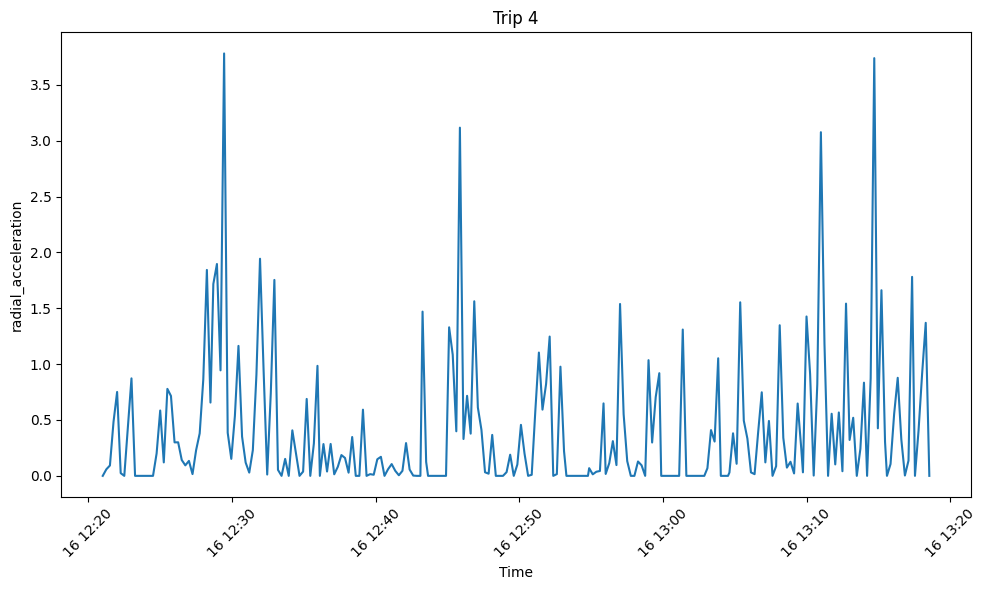

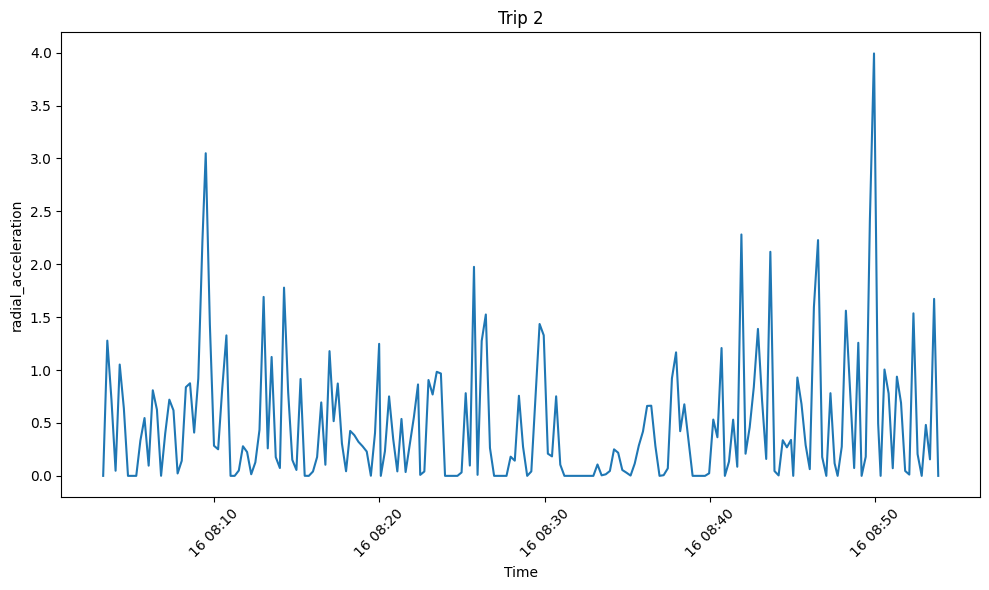

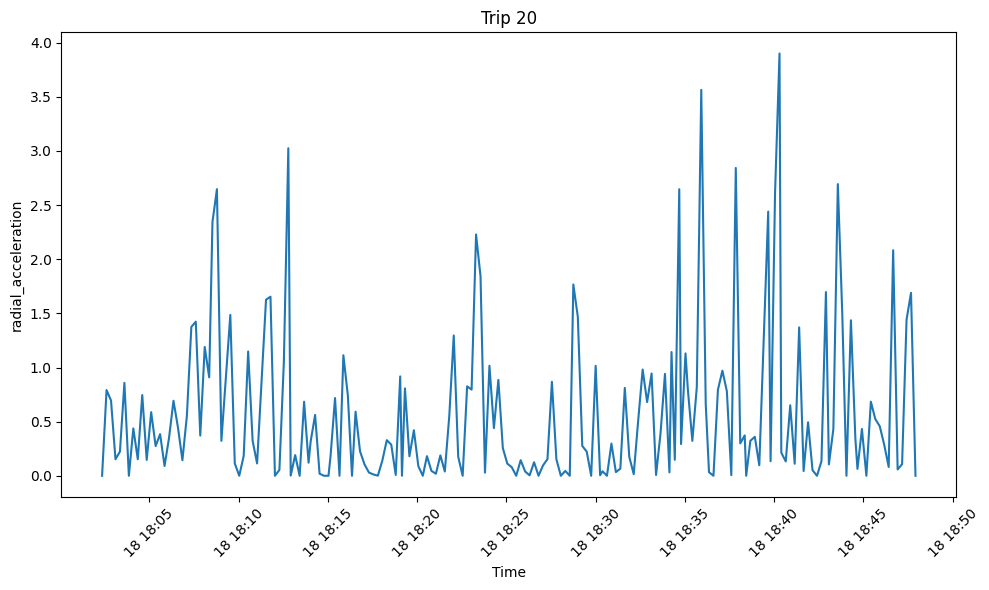

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have 'data' DataFrame containing bus data

# Convert 'devicetime' column to datetime
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Draw a line graph of radial acceleration against time for a single trip
def draw_radial_acceleration_graph(trip_id):
    trip_df = data[data["trip_id"] == trip_id]
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(trip_df["devicetime"], trip_df["radial_acceleration"])
    plt.xlabel("Time")
    plt.ylabel("radial_acceleration")
    plt.title("Trip " + str(trip_id))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better formatting
    plt.show()

draw_radial_acceleration_graph(4)
draw_radial_acceleration_graph(2)
draw_radial_acceleration_graph(20)


### Distance from start

#### Cumalative addition of distance

In [20]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with columns: 'trip_id', 'latitude', 'longitude', and 'devicetime'
# Convert the 'devicetime' column to pandas Timestamp if it's not already
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Function to calculate Haversine distance between two points
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371000  # Earth's radius in meters
    phi_1 = np.radians(lat1)
    phi_2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c
    return meters

# Calculate the distance between consecutive rows within the same trip
data['distance'] = data.groupby('trip_id').apply(lambda group: haversine_distance(group['latitude'], group['longitude'], group['latitude'].shift(), group['longitude'].shift())).reset_index(level=0, drop=True)

# Calculate cumulative distance for each trip
data['cumulative_distance'] = data.groupby('trip_id')['distance'].cumsum()

print(data)


C:\Users\gw\AppData\Local\Temp\ipykernel_42700\3386483257.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['devicetime'] = pd.to_datetime(data['devicetime'])


                id  deviceid          devicetime  latitude  longitude  \
1        574733099       116 2021-10-16 08:03:19  7.293068  80.636430   
2        574733100       116 2021-10-16 08:03:34  7.293043  80.637552   
3        574733101       116 2021-10-16 08:03:49  7.292725  80.637707   
4        574733102       116 2021-10-16 08:04:04  7.292292  80.637663   
5        574736662       116 2021-10-16 08:04:19  7.291640  80.637455   
...            ...       ...                 ...       ...        ...   
1200915  887885901      1410 2022-02-22 15:04:26  7.291790  80.635067   
1200917  893951863      1410 2022-02-24 10:32:21  7.291703  80.635357   
1200919  895005999      1410 2022-02-24 14:51:43  7.291685  80.635282   
1200921  895866047      1410 2022-02-24 18:46:53  7.291740  80.635173   
1200923  902351019      1410 2022-02-26 16:00:47  7.291827  80.634998   

            speed        date      time  \
1        14.03890  2021-10-16  08:03:19   
2        10.25920  2021-10-16  08:03:

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\3386483257.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance'] = data.groupby('trip_id').apply(lambda group: haversine_distance(group['latitude'], group['longitude'], group['latitude'].shift(), group['longitude'].shift())).reset_index(level=0, drop=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\3386483257.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cumulative_distance'] = data.groupby('trip_id')['distance'].cumsum()


In [21]:
# drop distance column and rename cumulative_distance to distance from start
data.drop(['distance'], axis=1, inplace=True)
data.rename(columns={'cumulative_distance': 'distance_from_start'}, inplace=True)


C:\Users\gw\AppData\Local\Temp\ipykernel_42700\1741688615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['distance'], axis=1, inplace=True)
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\1741688615.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'cumulative_distance': 'distance_from_start'}, inplace=True)


In [22]:
# fill nan with 0
data['distance_from_start'].fillna(0, inplace=True)

C:\Users\gw\AppData\Local\Temp\ipykernel_42700\3434640243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_from_start'].fillna(0, inplace=True)


In [23]:
# save as csv file 
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance.csv', index=False)

## Get Accelaration and Breaks

In [24]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'data' with columns: 'acceleration', 'devicetime', and 'trip_id'
# Convert the 'devicetime' column to pandas Timestamp if it's not already
data['devicetime'] = pd.to_datetime(data['devicetime'])

# Calculate time difference between consecutive rows within the same trip
data['time_diff'] = data.groupby('trip_id')['devicetime'].diff()

# Calculate change in acceleration between consecutive rows within the same trip
data['acc_diff'] = data.groupby('trip_id')['acceleration'].diff()

# Filter out rows with time differences close to zero
data = data[data['time_diff'].dt.total_seconds() > 0.001]  # Adjust the threshold as needed

# Calculate acceleration by dividing acceleration difference by time difference (avoiding division by zero)
data['acceleration_der'] = data['acc_diff'] / data['time_diff'].dt.total_seconds()

# Handle the case where time difference is zero or very close to zero, set acceleration_der to 0
data['acceleration_der'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['acceleration_der'].fillna(0, inplace=True)

data


C:\Users\gw\AppData\Local\Temp\ipykernel_42700\4187010655.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['devicetime'] = pd.to_datetime(data['devicetime'])
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\4187010655.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_diff'] = data.groupby('trip_id')['devicetime'].diff()
C:\Users\gw\AppData\Local\Temp\ipykernel_42700\4187010655.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
2,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),NaN,2.0,1,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
3,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),NaN,2.0,1,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
4,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),NaN,2.0,1,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
5,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
6,574736663,116,2021-10-16 08:04:34,7.291210,80.637713,8.63931,2021-10-16,08:04:34,POINT (184982.64260533327 232114.61697960715),101,2.0,1,-0.035997,0.639311,343.141212,0 days 00:00:15,-0.395969,-0.026398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196697,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),NaN,5586.0,2,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1196698,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),NaN,5586.0,2,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1196699,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),NaN,5586.0,2,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1196700,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),NaN,5586.0,2,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


In [25]:
# save as csv file 
data.to_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv', index=False)

In [26]:
data[data['trip_id'] == 1]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
603449,574670750,116,2021-10-16 07:09:01,7.297437,80.732405,26.45790,2021-10-16,07:09:01,POINT (195438.12872336336 232801.1612767437),NaN,1.0,2,0.467960,5.118394,164.372574,0 days 00:00:15,-0.359977,-0.023998
603450,574670751,116,2021-10-16 07:09:07,7.297405,80.731912,5.93953,2021-10-16,07:09:07,POINT (195383.6502416536 232797.67165609493),NaN,1.0,2,-3.419728,0.160064,218.905086,0 days 00:00:06,-3.887688,-0.647948
603451,574670752,116,2021-10-16 07:09:22,7.297420,80.731760,11.33910,2021-10-16,07:09:22,POINT (195366.91165386062 232799.3318686765),NaN,1.0,2,0.359971,0.876561,235.708681,0 days 00:00:15,3.779700,0.251980
603452,574674200,116,2021-10-16 07:09:37,7.296582,80.730467,23.21820,2021-10-16,07:09:37,POINT (195224.09394981578 232706.6326083481),NaN,1.0,2,0.791940,1.501459,406.124140,0 days 00:00:15,0.431969,0.028798
603453,574674201,116,2021-10-16 07:09:49,7.295782,80.729912,6.47948,2021-10-16,07:09:49,POINT (195162.80597197908 232618.17249434622),NaN,1.0,2,-1.394893,0.625649,514.106780,0 days 00:00:12,-2.186833,-0.182236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603627,574721058,116,2021-10-16 07:52:04,7.290488,80.639197,15.65880,2021-10-16,07:52:04,POINT (185146.39864183826 232034.7613024236),213,1.0,2,0.107993,0.335613,15109.924458,0 days 00:00:15,-0.143987,-0.009599
603628,574721059,116,2021-10-16 07:52:19,7.290703,80.638345,15.11880,2021-10-16,07:52:19,POINT (185052.36454834338 232058.56421277564),NaN,1.0,2,-0.036000,0.560198,15206.857873,0 days 00:00:15,-0.143993,-0.009600
603629,574721060,116,2021-10-16 07:52:34,7.291200,80.637448,11.87910,2021-10-16,07:52:34,POINT (184953.38214140348 232113.51984820014),NaN,1.0,2,-0.215980,0.467643,15320.126992,0 days 00:00:15,-0.179980,-0.011999
603630,574721061,116,2021-10-16 07:52:49,7.291317,80.636253,17.81860,2021-10-16,07:52:49,POINT (184821.43935639565 232126.4531743611),NaN,1.0,2,0.395967,0.559181,15452.566610,0 days 00:00:15,0.611947,0.040796


In [27]:
# Draw a line graph of radial acceleration against time for a single trip
def drawAgainst(data,trip_id,columnx,columny):
    trip_df = data[data["trip_id"] == trip_id]
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(trip_df[f"{columnx}"], trip_df[f"{columny}"])
    plt.xlabel(f"{columnx}")
    plt.ylabel(f"{columny}")
    plt.title("Trip " + str(trip_id))
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.tight_layout()  # Adjust layout for better formatting
    plt.show()


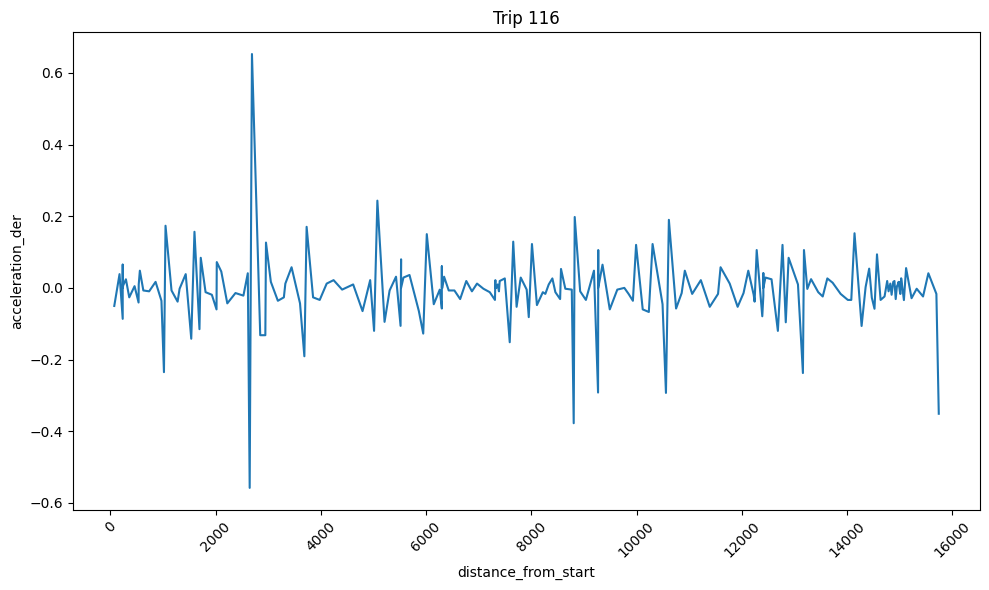

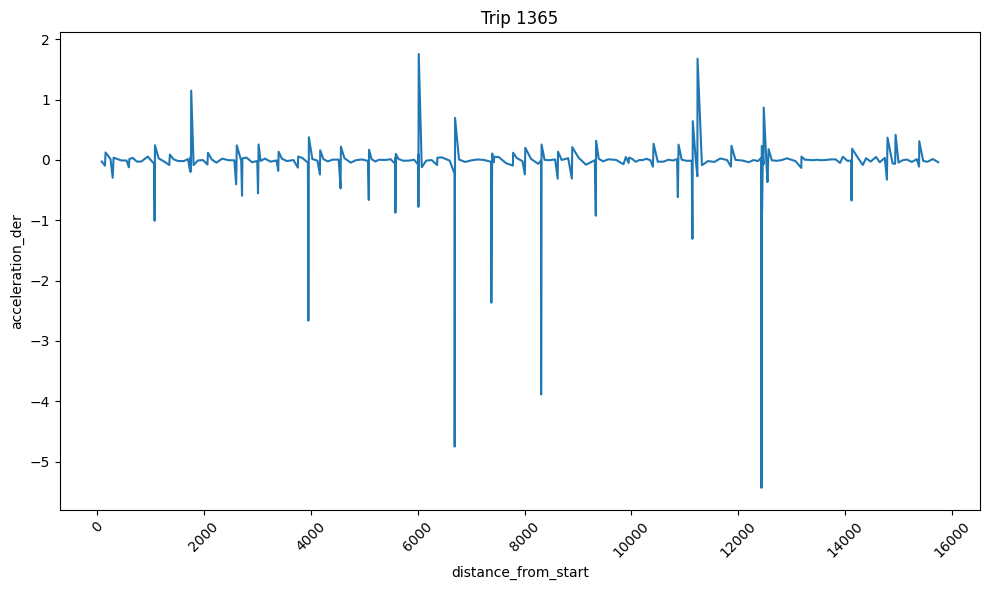

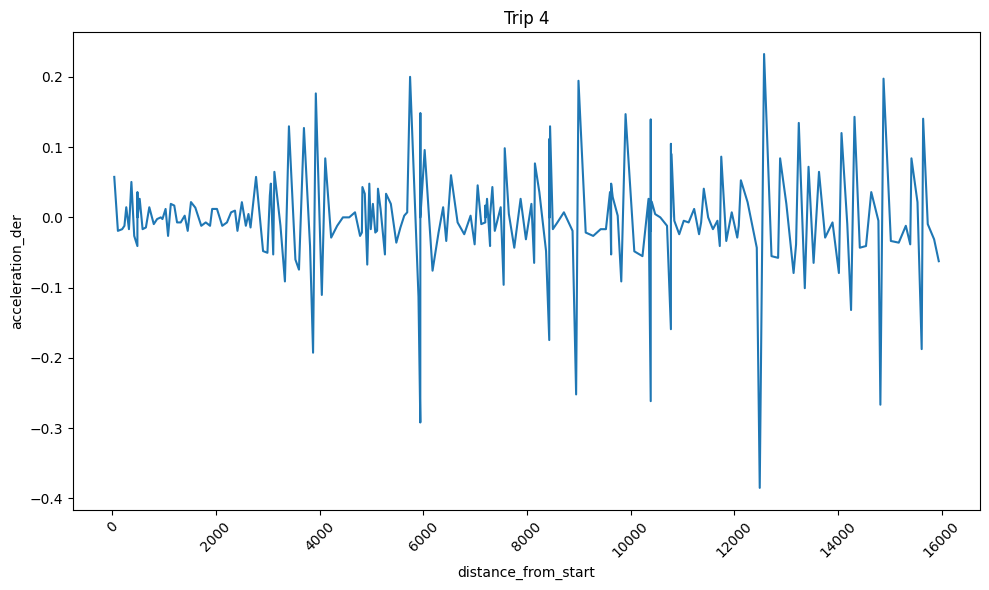

In [28]:
drawAgainst(data,116,'distance_from_start','acceleration_der')
drawAgainst(data,1365,'distance_from_start','acceleration_der')
drawAgainst(data,4,'distance_from_start','acceleration_der')

## Check whether the time or distance is better

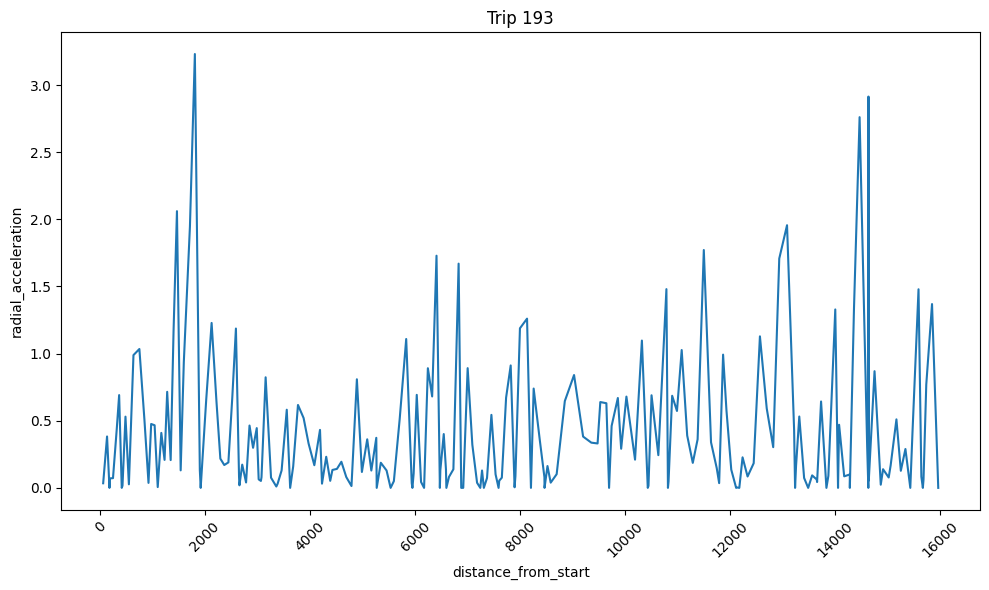

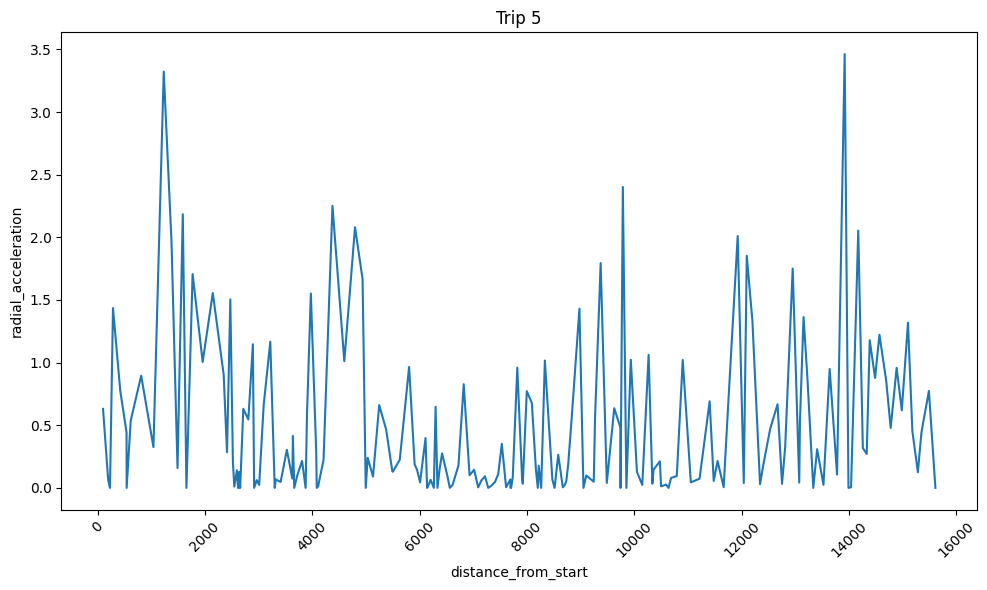

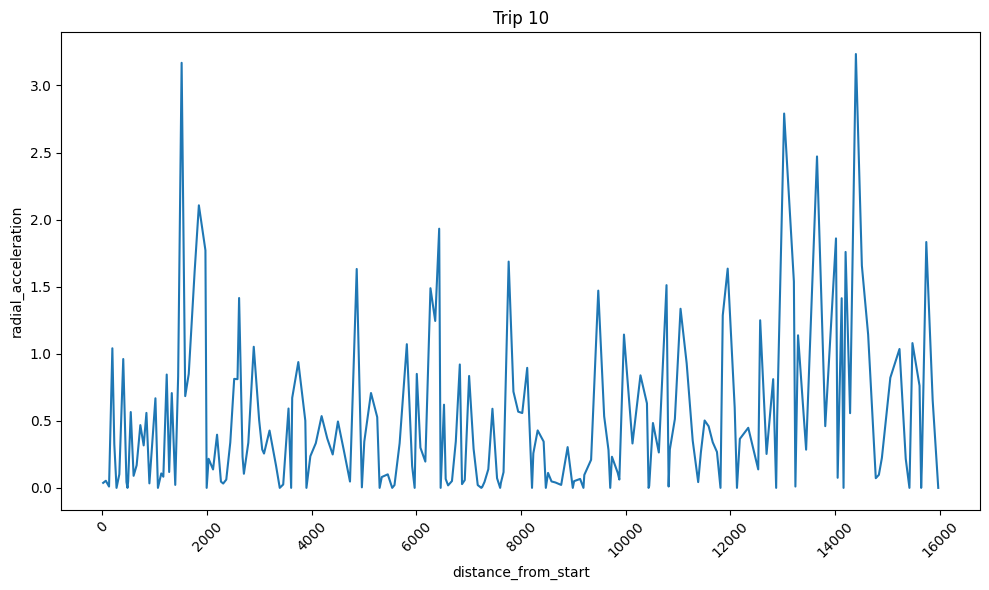

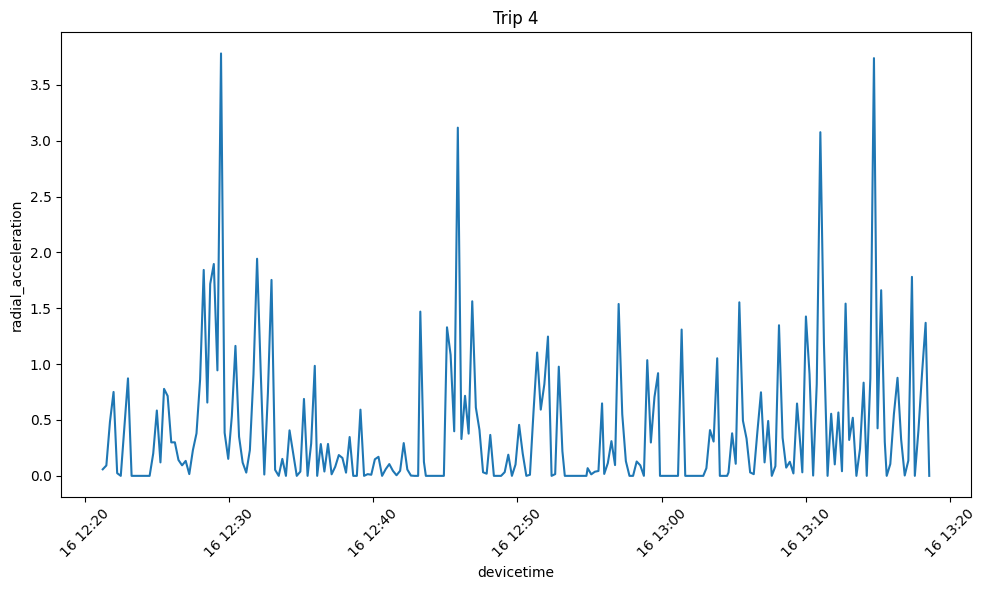

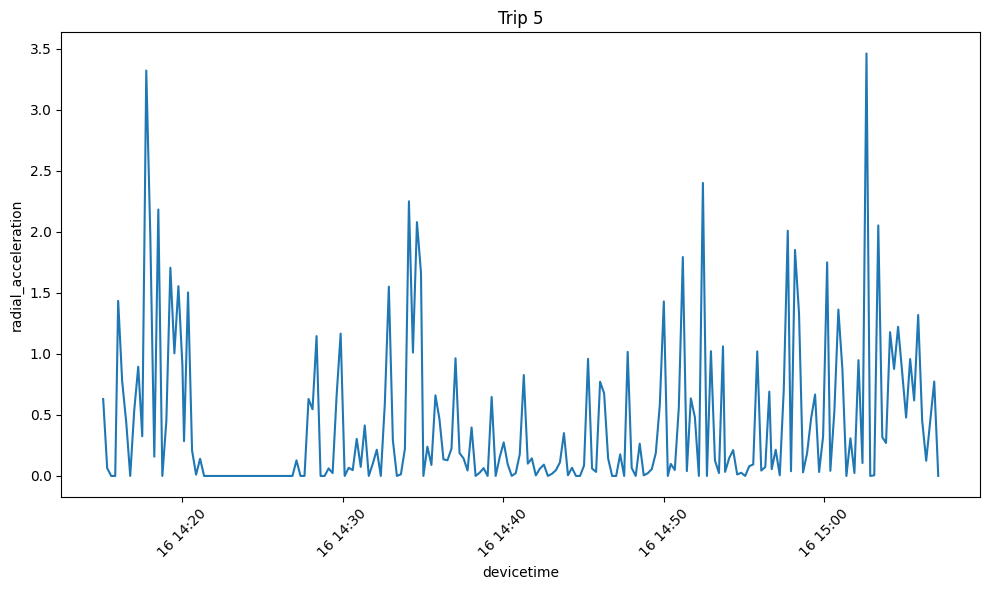

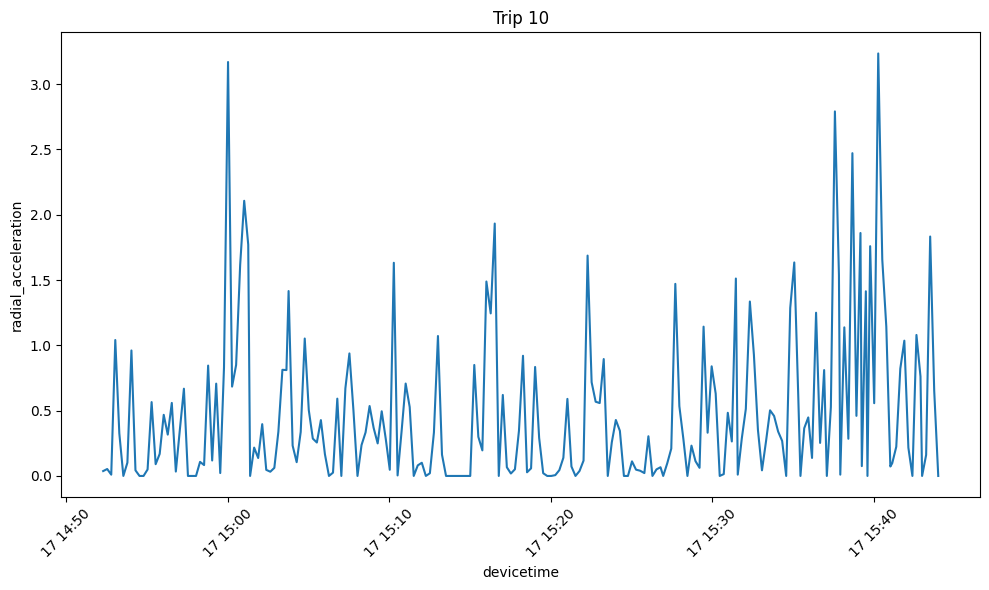

In [29]:
drawAgainst(data,193,'distance_from_start','radial_acceleration')
drawAgainst(data,5,'distance_from_start','radial_acceleration')
drawAgainst(data,10,'distance_from_start','radial_acceleration')

print("=========================================================")

drawAgainst(data,4,'devicetime','radial_acceleration')
drawAgainst(data,5,'devicetime','radial_acceleration')
drawAgainst(data,10,'devicetime','radial_acceleration')

Seem like distance is better